In [64]:
import math
import pandas_datareader as wb
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [65]:
df= pd.read_csv('/Users/kgirish/desktop/PG.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.000000,1.441406,1.421875,1.429688,0.282667,192000
1,1962-01-03,0.000000,1.429688,1.402344,1.414063,0.279577,428800
2,1962-01-04,0.000000,1.417969,1.390625,1.390625,0.274944,326400
3,1962-01-05,0.000000,1.394531,1.363281,1.380859,0.273013,544000
4,1962-01-08,0.000000,1.373047,1.328125,1.343750,0.265676,1523200
...,...,...,...,...,...,...,...
14788,2020-09-30,138.160004,139.850006,137.809998,138.990005,138.990005,8727800
14789,2020-10-01,139.580002,139.990005,138.210007,139.240005,139.240005,5713400
14790,2020-10-02,137.929993,139.119995,136.949997,138.119995,138.119995,6077900
14791,2020-10-05,138.720001,139.649994,138.300003,139.389999,139.389999,6333900


In [66]:
df1=df.reset_index()['Close']

In [67]:
df1

0          1.429688
1          1.414063
2          1.390625
3          1.380859
4          1.343750
            ...    
14788    138.990005
14789    139.240005
14790    138.119995
14791    139.389999
14792    139.610001
Name: Close, Length: 14793, dtype: float64

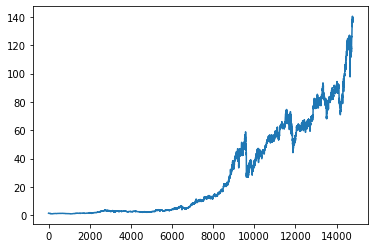

In [68]:
import matplotlib.pyplot as plt
plt.plot(df1)s

In [69]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [70]:
df1

0          1.429688
1          1.414063
2          1.390625
3          1.380859
4          1.343750
            ...    
14788    138.990005
14789    139.240005
14790    138.119995
14791    139.389999
14792    139.610001
Name: Close, Length: 14793, dtype: float64

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [72]:
print(df1)


[[0.00370764]
 [0.00359571]
 [0.00342782]
 ...
 [0.9828794 ]
 [0.99197698]
 [0.99355295]]


In [73]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [74]:
training_size,test_size

(9615, 5178)

In [75]:
train_data

array([[0.00370764],
       [0.00359571],
       [0.00342782],
       ...,
       [0.30664247],
       [0.21195085],
       [0.2012057 ]])

In [76]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [77]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [78]:
print(X_train.shape), print(y_train.shape)

(9514, 100)
(9514,)


(None, None)

In [79]:
print(X_test.shape), print(y_test.shape)

(5077, 100)
(5077,)


(None, None)

In [80]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [81]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [82]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [83]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
149/149 [==============================] - 31s 208ms/step - loss: 4.0188e-04 - val_loss: 8.1164e-04
Epoch 2/100
149/149 [==============================] - 30s 199ms/step - loss: 2.9363e-05 - val_loss: 0.0011
Epoch 3/100
149/149 [==============================] - 29s 198ms/step - loss: 2.8072e-05 - val_loss: 0.0012
Epoch 4/100
149/149 [==============================] - 30s 200ms/step - loss: 2.8330e-05 - val_loss: 0.0016
Epoch 5/100
149/149 [==============================] - 29s 198ms/step - loss: 2.5976e-05 - val_loss: 4.3923e-04
Epoch 6/100
149/149 [==============================] - 29s 196ms/step - loss: 2.8464e-05 - val_loss: 9.2948e-04
Epoch 7/100
149/149 [==============================] - 30s 200ms/step - loss: 2.0694e-05 - val_loss: 8.0621e-04
Epoch 8/100
149/149 [==============================] - 1912s 13s/step - loss: 2.0423e-05 - val_loss: 3.9237e-04
Epoch 9/100
149/149 [==============================] - 53s 355ms/step - loss: 2.4060e-05 - val_loss: 2.7876e-04
Epoc

In [86]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [87]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [88]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

14.158826352472243

In [89]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

69.36473022331859

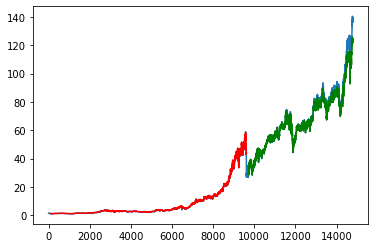

In [115]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot, color= 'r')
plt.plot(testPredictPlot, color = 'g')
plt.show()

In [91]:
len(test_data)

5178

In [98]:
x_input=test_data[5078:].reshape(1,-1)
x_input.shape

(1, 100)

In [99]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [100]:
temp_input

[0.8144671474466311,
 0.8259286247357642,
 0.7989225066058665,
 0.8049397682139685,
 0.7930484993160999,
 0.8000686271137372,
 0.7959854778889703,
 0.8093094618925676,
 0.8248541027333322,
 0.8238512222169323,
 0.833378601449595,
 0.8391809672533292,
 0.8425477875789609,
 0.8247825042278936,
 0.841115122617258,
 0.8462728010078892,
 0.8411867139592644,
 0.8475622188146889,
 0.8262868178390609,
 0.8217022283560941,
 0.8293670937108604,
 0.8396824003480969,
 0.838249735386394,
 0.8479203617739598,
 0.845341518996928,
 0.8369603175795942,
 0.836817070424691,
 0.8274329383469315,
 0.8379631909325618,
 0.8189084897746947,
 0.8363156373299234,
 0.8499977642927915,
 0.8529347930096878,
 0.859381839063093,
 0.8647544132580919,
 0.86898086694522,
 0.8737803522325546,
 0.8708433736596841,
 0.8809437844925531,
 0.882089962307882,
 0.8895398817142546,
 0.8853134853345844,
 0.8871759920490486,
 0.8934081422980861,
 0.8906144108801188,
 0.8893966417227835,
 0.8970615070775498,
 0.897204811539911,
 0

In [101]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8839928]
101
1 day input [0.82592862 0.79892251 0.80493977 0.7930485  0.80006863 0.79598548
 0.80930946 0.8248541  0.82385122 0.8333786  0.83918097 0.84254779
 0.8247825  0.84111512 0.8462728  0.84118671 0.84756222 0.82628682
 0.82170223 0.82936709 0.8396824  0.83824974 0.84792036 0.84534152
 0.83696032 0.83681707 0.82743294 0.83796319 0.81890849 0.83631564
 0.84999776 0.85293479 0.85938184 0.86475441 0.86898087 0.87378035
 0.87084337 0.88094378 0.88208996 0.88953988 0.88531349 0.88717599
 0.89340814 0.89061441 0.88939664 0.89706151 0.89720481 0.89577209
 0.89835093 0.90952586 0.91260615 0.93488442 0.93273537 0.93395314
 0.95186172 0.94935458 0.94412531 0.95014257 0.95408248 0.94785022
 0.96382475 0.96611699 0.96124591 0.96411124 0.97134627 0.9660454
 0.97378192 0.97800831 0.98567314 0.98961304 0.98481355 0.98352419
 0.98753569 0.98438377 0.98330919 1.         0.98388228 0.98173333
 0.96726316 0.98309429 0.97270734 0.98302269 0.98653282 0.98653282
 0.97987077 0.9785814  0.97750682 0

In [102]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [103]:
import matplotlib.pyplot as plt

In [104]:
len(df1)

14793

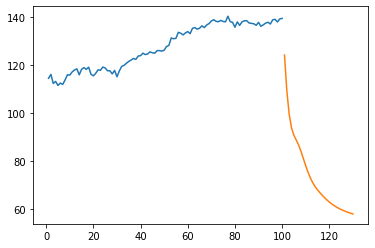

In [105]:
plt.plot(day_new,scaler.inverse_transform(df1[14693:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

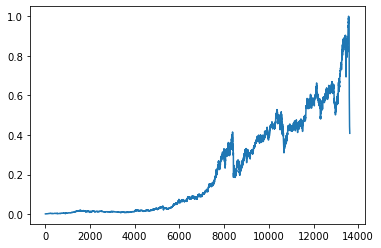

In [106]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [107]:
df3=scaler.inverse_transform(df3).tolist()

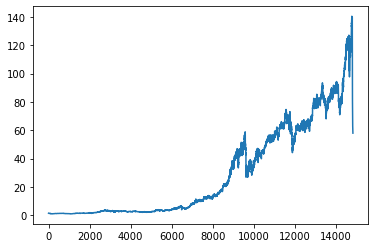

In [108]:
plt.plot(df3)